In [15]:
# import libraries
import numpy as np 
import pandas as pd
import tensorflow as tf

import matplotlib.pylab as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization

import string
from pathlib import Path

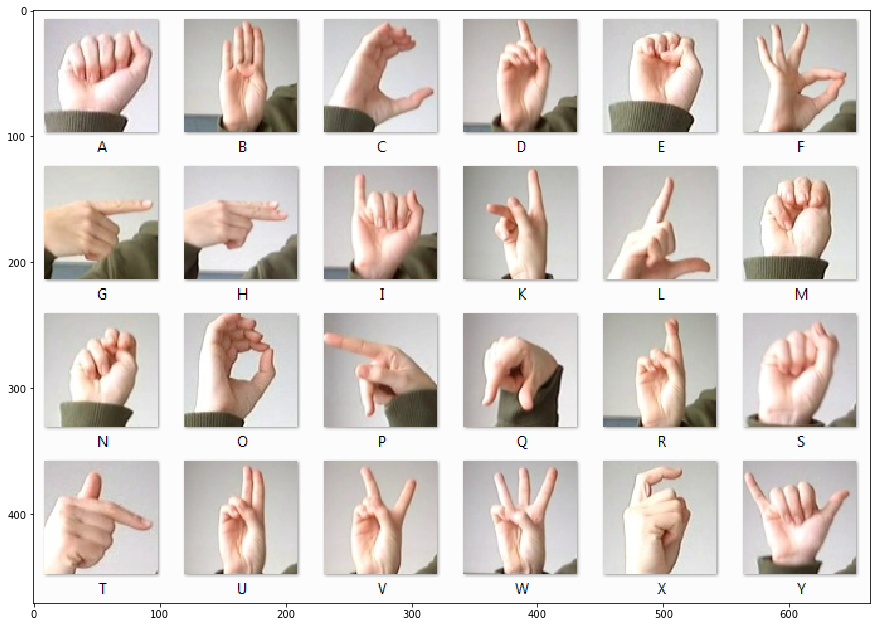

In [2]:
# view intro image
plt.figure(figsize = (15,15))
img=mpimg.imread('amer_sign2.png')
imgplot = plt.imshow(img)

In [3]:
# create letter list
lettet_list = string.ascii_uppercase[:25]

In [4]:
# load data and split train and test 
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

X_train = train_df.copy()
X_test = test_df.copy()
y_train = X_train.pop('label')
y_test = X_test.pop('label')

In [5]:
# inspect data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
# convert num label to letter string
y_train = np.array([lettet_list[i] for i in y_train])
y_test = np.array([lettet_list[i] for i in y_test])

In [7]:
# reshape to flattened value to image
X_train = np.array([np.reshape(i,(28,28)) for i in X_train.values])
X_test =  np.array([np.reshape(i,(28,28)) for i in X_test.values])

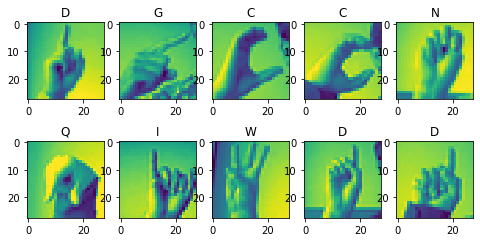

In [8]:
# view data in images
fig=plt.figure(figsize=(8, 4))
columns = 5
rows = 2

for i, (img,label) in enumerate(zip(X_train[:10], y_train[:10])):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
    plt.title(label)

In [9]:
# transform y_train

le = LabelEncoder()
y_train = le.fit_transform(y_train)

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)

In [10]:
# set parameters
input_shape = (28,28,1)
batch_size = 256
num_classes = 24
epochs = 10

In [11]:
# transform X (add dim and normalize)
X_train = X_train.reshape(X_train.shape + (1,))/255
X_test =  X_test.reshape(X_test.shape + (1,))/255

In [12]:
def build_model(input_shape,num_classes):
    model = Sequential()

    model.add(Conv2D(64, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(scale=False, center=False))

    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(scale=False, center=False))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    return model

In [13]:
# build and run model
model = build_model(input_shape,num_classes)
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Train on 21964 samples, validate on 5491 samples
Epoch 1/10
21964/21964 [==============================] - 98s 4ms/step - loss: 0.4143 - accuracy: 0.8955 - val_loss: 3.4362 - val_accuracy: 0.0410
Epoch 2/10
21964/21964 [==============================] - 97s 4ms/step - loss: 0.0179 - accuracy: 0.9997 - val_loss: 3.6025 - val_accuracy: 0.0783
Epoch 3/10
21964/21964 [==============================] - 96s 4ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 3.3571 - val_accuracy: 0.1105
Epoch 4/10
21964/21964 [==============================] - 94s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.1617 - val_accuracy: 0.3615
Epoch 5/10
21964/21964 [==============================] - 104s 5ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.7288 - val_accuracy: 0.7856
Epoch 6/10
21964/21964 [==============================] - 102s 5ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9836
Epoch 7/10
21964/21964 [==============================] - 104s 5ms/

In [16]:
# Save neural network structure
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("model_weights.h5")

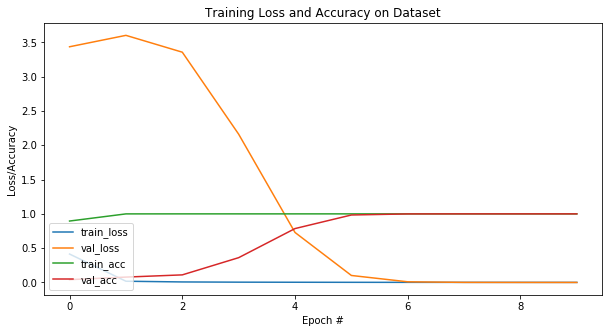

In [17]:
# plot the training loss and accuracy
N = np.arange(0, epochs)
plt.figure(figsize=(10,5))
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [18]:
# generate classification report
y_pred = le.inverse_transform(model.predict_classes(X_test))
correct = np.nonzero(y_pred==y_test)
incorrect = np.nonzero(y_pred!=y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.94      1.00      0.97       331
           B       1.00      0.95      0.98       432
           C       1.00      1.00      1.00       310
           D       0.94      1.00      0.97       245
           E       0.94      0.99      0.97       498
           F       1.00      1.00      1.00       247
           G       0.89      0.93      0.91       348
           H       0.90      0.94      0.92       436
           I       1.00      0.79      0.88       288
           K       0.94      0.94      0.94       331
           L       0.98      1.00      0.99       209
           M       0.85      0.84      0.84       394
           N       0.83      0.71      0.77       291
           O       1.00      0.89      0.94       246
           P       0.96      1.00      0.98       347
           Q       1.00      1.00      1.00       164
           R       0.75      0.85      0.80       144
           S       0.77    

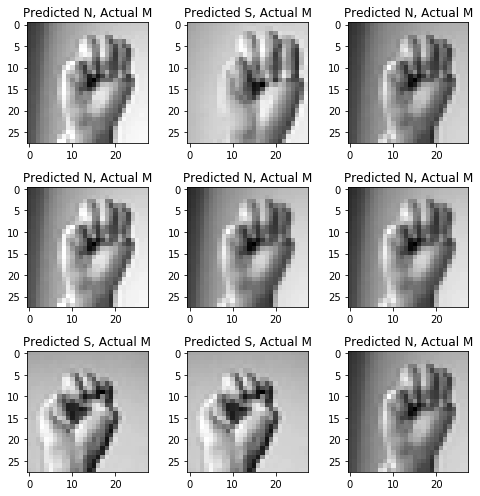

In [20]:
#evaluate why M cannot be classified correctly
incorrect_m_ix = (np.logical_and(y_test=='M',y_pred!=y_test))
plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect_m_ix][i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual {}".format(y_pred[incorrect_m_ix][i],y_test[incorrect_m_ix][i]))
    plt.tight_layout()